# Búsqueda en Árbol B

La búsqueda en un Árbol B es un proceso fundamental para entender cómo funcionan estas estructuras de datos, especialmente dada su importancia en sistemas de bases de datos y sistemas de archivos debido a su eficiencia en operaciones de búsqueda, inserción y eliminación. Un Árbol B es un árbol balanceado de búsqueda, en el cual un nodo puede tener más de dos hijos. Esta característica lo distingue de los árboles binarios y le permite ser altamente eficiente en operaciones sobre grandes conjuntos de datos.

## Concepto de Búsqueda en Árbol B

1. **Inicio de la Búsqueda:**
La operación de búsqueda inicia en la raíz del árbol B.

2. **Comparación de Elementos:**
En el nodo actual, se compara el valor a buscar con los elementos (claves) del nodo.

3. **Condición de Éxito:**
Si el valor coincide con uno de los elementos del nodo, la búsqueda concluye exitosamente.

4. **Búsqueda en Subárbol Izquierdo:**
Si el valor buscado es menor que el elemento más pequeño del nodo, la búsqueda prosigue en el subárbol izquierdo del primer elemento.

5. **Búsqueda en Subárbol Derecho:**
Si el valor buscado es mayor que el elemento más grande del nodo, la búsqueda se dirige al subárbol derecho del último elemento.

6. **Búsqueda en Subárbol Intermedio:**
Si el valor se encuentra entre dos elementos, esto indica que podría estar en el subárbol que se ubica entre estos dos elementos. Por lo tanto, la búsqueda continúa en el subárbol intermedio correspondiente.

Este proceso se repite, avanzando a través de los niveles del árbol, hasta que se encuentra el valor o se alcanza un nodo hoja sin encontrarlo, lo cual indicaría que el valor buscado no está presente en el árbol.

## Implementación en Python

In [52]:
# Código utilitario
from src.visualization import visualize_b_tree
# ver src/BTree.py
from src.BTree import BTree

In [53]:
# Método para buscar una clave en el árbol B
def search(node, key, depth=0):
    # Inicializa la posición en 0
    i = 0
    # Busca la posición de la clave si esta es mayor que la clave actual del
    # nodo
    while i < len(node.keys) and key > node.keys[i]:
        i += 1
    # Si encuentra la clave, devuelve el nodo y su posición
    if i < len(node.keys) and key == node.keys[i]:
        # Imprime detalles sobre dónde se encontró la clave
        print(f"Clave {key} encontrada en el nivel {depth}, posición {i} del nodo.")
        return node, i, depth
    # Si llega a una hoja y no encuentra la clave, devuelve None
    if node.leaf:
        print(f"Clave {key} no encontrada en el nivel {depth}.")
        return None
    else:
        # Realiza búsqueda recursiva en el hijo correspondiente
        print(f"Navegando al nivel {depth+1} en la búsqueda de la clave {key}.")
        return search(node.children[i], key, depth+1)

# Extender la clase BTree con el nuevo método
BTree.search = search

## Pruebas de Búsqueda

Nodo BTree inicializado como hoja
Árbol B inicializado con grado mínimo 2
Llave insertada en nodo hoja.
Llave insertada: 1
Llave insertada en nodo hoja.
Llave insertada: 120
Llave insertada en nodo hoja.
Llave insertada: 81
Nodo BTree inicializado
Nodo BTree inicializado como hoja
Nodo hijo dividido en dos nodos.
Llave insertada en nodo hoja.
Navegando hacia hijo para continuar inserción.
Llave insertada: 5
Llave insertada en nodo hoja.
Navegando hacia hijo para continuar inserción.
Llave insertada: 170


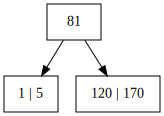

BUSCAR:
Navegando al nivel 1 en la búsqueda de la clave 15.
Clave 15 no encontrada en el nivel 1.
Navegando al nivel 1 en la búsqueda de la clave 120.
Clave 120 encontrada en el nivel 1, posición 0 del nodo.
Navegando al nivel 1 en la búsqueda de la clave 1.
Clave 1 encontrada en el nivel 1, posición 0 del nodo.


In [54]:
btree = BTree(t=2)
keys_to_insert = [1, 120, 81, 5, 170]

for key in keys_to_insert:
    btree.insert(key)

# Visualizar el árbol
dot = visualize_b_tree(btree.root)
display(dot)

print('BUSCAR:')
keys_to_search = [15, 120, 1]
for key in keys_to_search:
    search(btree.root, key)

## Complejidad del Algoritmo
- **Complejidad del Tiempo:** La búsqueda en un Árbol B tiene una complejidad de tiempo de O(log n), donde (n) es el número de claves en el árbol. Esto es debido a la naturaleza balanceada del árbol y al hecho de que un nodo puede tener múltiples hijos, permitiendo una división más eficiente del espacio de búsqueda.
- **Complejidad del Espacio:** O(1) en el caso de la búsqueda, ya que no se requiere espacio adicional significativo aparte del stack de llamadas recursivas, el cual es limitado debido a la altura del árbol.

## Ejercicios Prácticos
1. Implementar una función que, dado un Árbol B y un rango de valores `[min, max]`, retorne todos los elementos dentro de ese rango.
2. Modificar la función de búsqueda para que retorne el camino (secuencia de nodos) desde la raíz hasta el nodo donde se encontró el valor buscado.